<b>OUTLIER DETECTION AND HANDLING</b> https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

## Feature Engineering

### Tasks

1. Feature Extraction

2. Feature Transformation

3. Feature Selection

### Feature Extraction

#### Text

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
    
We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to "convert text into a matrix of token counts".

BAG OF WORDS:<br />
https://machinelearningmastery.com/gentle-introduction-bag-words-model/

TF-IDF:<br />
https://www.commonlounge.com/discussion/99e86c9c15bb4d23a30b111b23e7b7b1

CODE EXAMPLE:<br />
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

lst_text=['it was the best of times','it was the worst of times',\
          'it was the age of wisdom','it was the age of foolishness']

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
dtm = vocab.fit_transform(lst_text)

'''
vocab.fit(lst_text)

dtm = vocab.transform()
'''

'\nvocab.fit(lst_text)\n\ndtm = vocab.transform()\n'

In [2]:
vocab.vocabulary_

{'it': 3,
 'was': 7,
 'the': 5,
 'best': 1,
 'of': 4,
 'times': 6,
 'worst': 9,
 'age': 0,
 'wisdom': 8,
 'foolishness': 2}

In [4]:
print(type(dtm))

print(dtm.shape)

# print(dtm)

print(dtm.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
(4, 10)
[[0 1 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]]


In [16]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(lst_text)

print(vocab.vocabulary_)

print(dtm.toarray()) # convert sparse matrix to nparray

{'it': 5, 'was': 16, 'the': 11, 'best': 2, 'of': 7, 'times': 15, 'it was': 6, 'was the': 17, 'the best': 13, 'best of': 3, 'of times': 9, 'worst': 19, 'the worst': 14, 'worst of': 20, 'age': 0, 'wisdom': 18, 'the age': 12, 'age of': 1, 'of wisdom': 10, 'foolishness': 4, 'of foolishness': 8}
[[0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1]
 [1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0]]


<b>Summary:</b>
<ul>
    <li> <code>vect.fit(lst_text)</code> <b>learns the vocabulary</b>
    <li> <code>vect.transform(lst_text)</code> <b>uses the fitted vocabulary</b> to build a <b>document-term matrix</b>
</ul>

In [20]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
lst_text=['It was the best of times','it was the worst of times',\
          'it was the age of wisdom','it was the age of foolishness']

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(lst_text)

print(vectorizer.vocabulary_)

print('*'*50)

print(dtm.toarray()) # convert sparse matrix to nparray

{'it': 3, 'was': 7, 'the': 5, 'best': 1, 'of': 4, 'times': 6, 'worst': 9, 'age': 0, 'wisdom': 8, 'foolishness': 2}
**************************************************
[[0.         0.60735961 0.         0.31694544 0.31694544 0.31694544
  0.4788493  0.31694544 0.         0.        ]
 [0.         0.         0.         0.31694544 0.31694544 0.31694544
  0.4788493  0.31694544 0.         0.60735961]
 [0.4788493  0.         0.         0.31694544 0.31694544 0.31694544
  0.         0.31694544 0.60735961 0.        ]
 [0.4788493  0.         0.60735961 0.31694544 0.31694544 0.31694544
  0.         0.31694544 0.         0.        ]]


### Feature Transformation

#### Normalization & Changing Distribution

Min-Max Scaling (Column Normalization)

Standard Scaling (Z score normalization)

In [8]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]])

print(a.reshape(6))

print('*'*50)

print(a.reshape(3,-1))

[1 2 3 4 5 6]
**************************************************
[[1 2]
 [3 4]
 [5 6]]


In [9]:
import numpy as np

data = np.array([1,1,0,-1,2,1,3,-2,4,100], dtype='f').reshape(-1,1)

data

array([[  1.],
       [  1.],
       [  0.],
       [ -1.],
       [  2.],
       [  1.],
       [  3.],
       [ -2.],
       [  4.],
       [100.]], dtype=float32)

In [49]:
# Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941177],
       [0.02941177],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941177],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.0000001 ]], dtype=float32)

In [50]:
(data-data.min())/(data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]], dtype=float32)

In [51]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(data)

array([[-0.3328055 ],
       [-0.3328055 ],
       [-0.36642224],
       [-0.40003896],
       [-0.2991888 ],
       [-0.3328055 ],
       [-0.26557207],
       [-0.43365568],
       [-0.23195536],
       [ 2.9952497 ]], dtype=float32)

In [13]:
(data-data.mean())/data.std()

array([[-0.3328055 ],
       [-0.3328055 ],
       [-0.36642224],
       [-0.40003896],
       [-0.2991888 ],
       [-0.3328055 ],
       [-0.26557207],
       [-0.43365568],
       [-0.23195536],
       [ 2.9952497 ]], dtype=float32)

#### Filling Missing Values

<code>sklearn.preprocessing.Imputer()</code><br />
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

### Feature Selection

#### Statistical Approach

It is reasonable to say that features with low variance are worse than those with high variance. So, one can consider cutting features with variance below a certain threshold.

In [3]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.datasets import make_classification

# generate a ndarray of size (100, 20)
x_data_generated, y_data_generated = make_classification()

x_data_generated.shape

(100, 20)

In [9]:
type(x_data_generated)

numpy.ndarray

In [4]:
VarianceThreshold(0.7).fit_transform(x_data_generated).shape

(100, 19)

In [5]:
VarianceThreshold(0.8).fit_transform(x_data_generated).shape

(100, 18)

In [6]:
VarianceThreshold(0.9).fit_transform(x_data_generated).shape

(100, 15)

In [21]:
# https://chrisalbon.com/machine_learning/feature_selection/variance_thresholding_for_feature_selection/

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# Load iris data
iris = datasets.load_iris()

print(type(iris))

# Create features and target
X = iris.data
y = iris.target

print(X.shape)
print(X[0:5])
print(X.std(axis=0))
print('*'*50)

# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold=.5)

# Conduct variance thresholding
X_high_variance = thresholder.fit_transform(X)

print(X_high_variance.shape)

# View first five rows with features with variances above threshold
print(X_high_variance[0:5])

<class 'sklearn.utils.Bunch'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0.82530129 0.43214658 1.75852918 0.76061262]
**************************************************
(150, 3)
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


<img src = '1.png' />

<b>Very Important: </b>
1. If variables represent different physical quantities their scaling can be different. By changing units (e.g. from measuring distance in kilometers to measuring distance in nanometers) you can change the scaling of a variable arbitrarily.

2. If the variance is zero, it means that the feature is constant and will not improve the performance of the model. In that case, it should be removed. Or if only a handful of observations differ from a constant value, the variance will also be very low.

3. If there is high correlation between 2 features then you would discard one of them. 

4. The features that are removed because of low variance have very low variance, that would be near to zero. You should always perform all the tests with existing data before discarding any features. 

#### Grid Search
(covered later)

## Pearson Correlation

<code>from scipy.stats import pearsonr</code>

p-value is significance of the non-correlated system. Low p-value means good.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


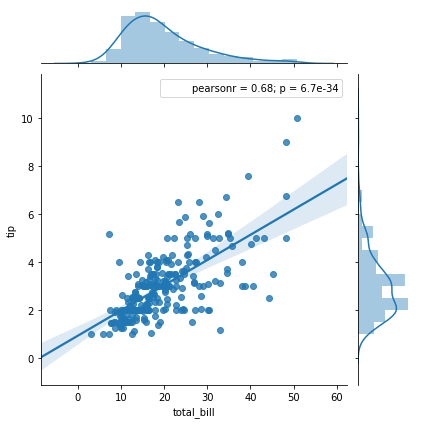

In [5]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

In [7]:
x = tips['total_bill']
y = tips['tip']

r,p = pearsonr(x,y)
print('Coefficient: ', r)
print('p-value: ',p)

Coefficient:  0.6757341092113643
p-value:  6.692470646864041e-34


## Test for Normality
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In statistical analysis, it is always important to be as percise as possible in our language. In general for a normality test, we are testing the null-hypothesis that the our 1D data is sampled from a population that has a Normal Distribution. We assume a significance level of 0.05 or 95% for our tests unless otherwise stated.

### Shapiro Wilk

The Shapiro-Wilk normality test is reputadely more well suited to smaller datasets.

<code>shapiro(data)</code> this function returns (test-stat (W), p-value)

Type of <b>data</b>: Univariate, Continuous

If W=1, data is normally distributed.<br />
If W<1, signifies the difference from normal distribution.

<b>NOTE:</b> Other tests are: KS Test and Anderson-Darling test. One graphical method to test normality is QQ-plot

In [47]:
from scipy.stats import shapiro
data = np.array([1,1,0,-1,2,1,3,-2,4,100], dtype='f').reshape(-1,1)
stat, p = shapiro(data)
print('Test Stat: %.3f, p-value: %.3f' % (stat, p))
# returns 'Test-statistics, p-value'

Test Stat: 0.420, p-value: 0.000


In [48]:
from sklearn.preprocessing import MinMaxScaler
shapiro(MinMaxScaler().fit_transform(data))

(0.41953399777412415, 4.197331406885496e-07)

In [19]:
shapiro(stand)

(0.41953399777412415, 4.197331406885496e-07)

<b>Conclusion: </b>Since our p-value is much less than our Test Statistic, we have good evidence to not reject the null hypothesis 

### QQ Plot

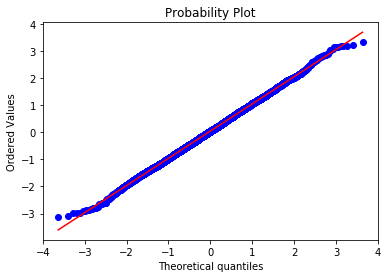

In [4]:
import numpy as np
import pylab
import scipy.stats as stats

std_normal = np.random.normal(0,1,5000)

stats.probplot(std_normal, dist='norm', plot=pylab)

pylab.show()

In [53]:
shapiro(std_normal)

(0.999696671962738, 0.6966670751571655)

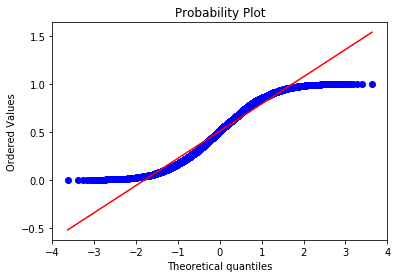

In [42]:
data = np.random.random((5000))

stats.probplot(data, dist='norm', plot=pylab)

pylab.show()

In [54]:
shapiro(data)

(0.41953399777412415, 4.197331406885496e-07)

## p-value

https://www.youtube.com/watch?v=-MKT3yLDkqk

## TODO

<b>Topics Left</b>

1. CDF
2. Missing values using classification